Посмотрим поведение цены за минуту, когда цена хая больше 0.5% от цены открытия.

Найдем цену стоп лосса в проценатах от цены открытия, чтобы мат ожидание модели было максимальным

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("binance_btcusd.csv")

In [4]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11
0,0,1596229260000,11322.05,11323.02,11294.00,11297.15,75.471279,1596229319999,8.534482e+05,1200,24.872009,281269.304392,0
1,1,1596229320000,11298.56,11332.02,11297.07,11330.86,57.373999,1596229379999,6.492224e+05,1486,36.822923,416647.500196,0
2,2,1596229380000,11331.09,11350.06,11330.86,11347.44,76.438368,1596229439999,8.670462e+05,1114,59.610735,676161.703455,0
3,3,1596229440000,11347.44,11365.28,11347.44,11363.27,90.757347,1596229499999,1.030781e+06,1130,52.535249,596693.051054,0
4,4,1596229500000,11363.46,11365.52,11363.27,11364.08,21.991909,1596229559999,2.499153e+05,332,4.848286,55096.556460,0


In [5]:
#добавляем столбец с таргетом, который говорит, поднялась ли цена более чем на 0.5% за эту минуту, или нет
df["target"] = ((df["2"]-df["1"])/df["1"])>=0.005

In [6]:
df.target.sum()

1733

In [8]:
true_df = df[df["target"]==True]

изучим значения Low столбца для наших положительних записей

а точнее, процентное отклонение Low цены от цены открытия

In [9]:
#добавим столбец процентного отклонения
true_df["low_percent"] = (true_df["1"]-true_df["3"])/true_df["1"]

<ipython-input-9-6b2a6f6fcfea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_df["low_percent"] = (true_df["1"]-true_df["3"])/true_df["1"]


In [10]:
true_df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,target,low_percent
1899,1899,1596343200000,11295.85,11371.40,10911.00,10927.00,1171.306842,1596343259999,1.301374e+07,11767,316.198934,3.533823e+06,0,True,0.034070
1900,1900,1596343260000,10927.00,11020.07,10750.00,10750.00,1473.768758,1596343319999,1.602194e+07,12215,470.727806,5.124835e+06,0,True,0.016198
1902,1902,1596343380000,10701.52,11100.01,10670.00,10938.77,885.878473,1596343439999,9.640333e+06,9922,456.538610,4.979123e+06,0,True,0.002945
1903,1903,1596343440000,10938.77,11091.08,10923.00,11020.69,596.786709,1596343499999,6.551693e+06,7215,261.523056,2.874253e+06,0,True,0.001442
1905,1905,1596343560000,10983.45,11117.50,10978.22,11057.23,569.300754,1596343619999,6.300463e+06,6554,313.109751,3.466652e+06,0,True,0.000476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268045,268045,1612311960000,35929.30,36150.00,35928.77,36141.05,460.537214,1612312019999,1.659600e+07,8242,354.266329,1.276399e+07,0,True,0.000015
268299,268299,1612327200000,36544.71,36845.00,36541.19,36809.81,298.169070,1612327259999,1.094859e+07,5825,185.590431,6.812420e+06,0,True,0.000096
268748,268748,1612354140000,35895.27,36122.18,35865.91,36090.92,93.755908,1612354199999,3.374175e+06,2497,65.513883,2.357933e+06,0,True,0.000818
268808,268808,1612357740000,36126.33,36331.88,36123.45,36315.85,148.999537,1612357799999,5.399883e+06,3081,107.243884,3.886756e+06,0,True,0.000080


c:\users\grish\pycharmprojects\testtest\venv1\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


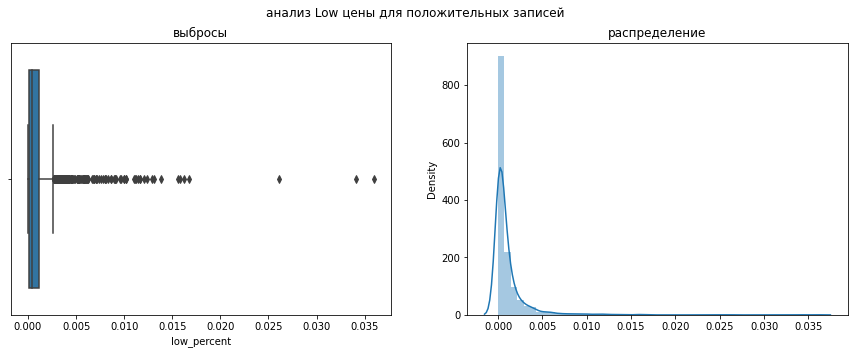

In [11]:
fig, axes = plt.subplots(1,2,figsize = (15,5))
fig.suptitle("анализ Low цены для положительных записей")

sns.boxplot(ax =axes[0], x = true_df["low_percent"])
axes[0].set_title("выбросы")

sns.distplot(ax = axes[1], x = true_df["low_percent"])
axes[1].set_title("распределение")

plt.show()

надо найти тот процент закрытия сделки, который принесет нам максимальную прибыль

мы имеем модель с 40% точностью определяющую возрастание цены в след минуту

будем идти по процентилем и смотреть на мат ожидание каждого варианта цены закрытия

In [12]:
percentiles = np.arange(50,101,5)

In [13]:
percentiles_list = [(percent, np.percentile(true_df["low_percent"], percent)) for percent in percentiles]
print(percentiles_list)

[(50, 0.00039136497783923466), (55, 0.0004661738520728945), (60, 0.0005792036787916054), (65, 0.0007295500933684723), (70, 0.0008845674476784682), (75, 0.0011145710568332301), (80, 0.0014006047366560334), (85, 0.0018154319885696664), (90, 0.0026387600551588154), (95, 0.004161301009635722), (100, 0.035962071337863756)]


Для тестов возьмем все эти значения стоп лосс цен

Пояснения:

    процентиль 60,допустим, означает, что мы ставим стоп лосс цену на 0.0004244% от цены открытия,
    а также отсекаем 40% потенциально плюсовых сделок

Получается, из всех предсказаных моделью положительных сделок, 40 будут истинно верны

Соответственно, в 40% будут приносить по 0.5% от ставки, а остальные 60% будут закрыты по стоп лосс цене

Но, из этих 40% лишь число процентиля будет приносить выгоду, а остальные проценты также будут закрыты по стоп лоссу

Давайте рассчитаем нашу прибыль за, допустим, n входов в сделку(модель n раз определила, что за следующую минуту 
                                                                 цена вырастет более чем на 0.5%)

Пометка: прибылью в примере будем считать ровно 0.5% от сделки, хотя на практике за минуту цена может подскачить более, чем на 0.5%

In [14]:
#определим функцию и применим ее к нашим тестовым стоп лоссам и процентилем
def stonks(min_profit,percentile, stop_loss, n_sdelok):
    minus_1 = 0.60*stop_loss
    minus_2 = 0.40*((100-percentile)/100)*stop_loss
    plus_1 = 0.40*(percentile/100)*min_profit
    
    return f"итоговый профит от {n_sdelok} сделок : {(minus_1+minus_2+plus_1)*n_sdelok} со стоп лоссом {stop_loss} и процентом отсечения {100-percentile}"

In [15]:
for i in percentiles_list:
    print(stonks(0.005,i[0],i[1],100))

итоговый профит от 100 сделок : 0.13130919822713877 со стоп лоссом 0.00039136497783923466 и процентом отсечения 50
итоговый профит от 100 сделок : 0.14636156046168577 со стоп лоссом 0.0004661738520728945 и процентом отсечения 45
итоговый профит от 100 сделок : 0.164019479588162 со стоп лоссом 0.0005792036787916054 и процентом отсечения 40
итоговый профит от 100 сделок : 0.18398670690926697 со стоп лоссом 0.0007295500933684723 и процентом отсечения 35
итоговый профит от 100 сделок : 0.20368885623284969 со стоп лоссом 0.0008845674476784682 и процентом отсечения 30
итоговый профит от 100 сделок : 0.22801997397832613 со стоп лоссом 0.0011145710568332301 и процентом отсечения 25
итоговый профит от 100 сделок : 0.2552411220926103 со стоп лоссом 0.0014006047366560334 и процентом отсечения 20
итоговый профит от 100 сделок : 0.289818511245598 со стоп лоссом 0.0018154319885696664 и процентом отсечения 15
итоговый профит от 100 сделок : 0.3488806435301642 со стоп лоссом 0.0026387600551588154 и пр

По результатам лучшее мат ожидание модели при стоп лоссе 3.5% от цены открытия. Или, другими словами, отсутствие стоп лосса, поскольку 3.5% - это макс отклонение из выборки.

Но, как по мне, это большой риск. Для первых тестов модели сделаем стоп лосс на 0.42% и процентом отсечения 5